### [Данные](https://stepik.org/media/attachments/course/4852/training_mush.csv) о съедобности грибов для части заданий. Взяты [отсюда](https://www.kaggle.com/uciml/mushroom-classification#mushrooms.csv), все категориальные переменные были закодированы числами для простоты.

In [5]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score

%config IPCompleter.greedy=True

In [9]:
mush = pd.read_csv('training_mush.csv')
mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [20]:
X = mush.drop(['class'], axis=1)
y = mush['class']

In [21]:
rf = RandomForestClassifier(random_state=0)

In [22]:
parametrs = {'n_estimators': range(10, 50, 10),
             'max_depth': range(1, 12, 2),
             'min_samples_leaf': range(1, 7), 
             'min_samples_split': range(2, 9, 2)}

In [26]:
grid_search_cv_clf = GridSearchCV(rf, parametrs, cv=3, n_jobs=-1, verbose=1)

In [27]:
grid_search_cv_clf.fit(X, y)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)},
             verbose=1)

In [28]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

<Axes: >

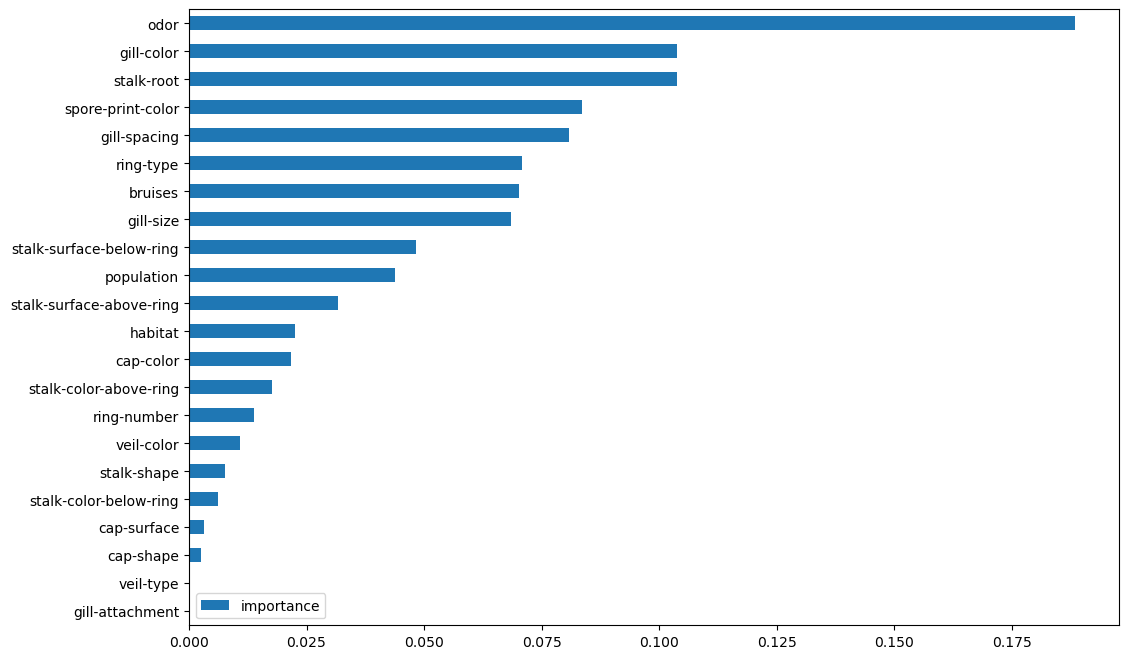

In [32]:
best_clf = grid_search_cv_clf.best_estimator_
imp = pd.DataFrame(best_clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

### Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих [грибов](https://stepik.org/media/attachments/course/4852/testing_mush.csv) и напишите в ответ число несъедобных грибов (класс равен 1).

In [33]:
X_test = pd.read_csv('testing_mush.csv')
X_test.head(2)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0


In [38]:
y_pred = best_clf.predict(X_test)
y_pred.sum()

976

### Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам.

In [42]:
y_test = pd.read_csv('testing_y_mush.csv')
y_test.head(2)

,class
0,0
1,0


In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test, y_pred)

array([[1055,    0],
       [   0,  976]], dtype=int64)

<Axes: >

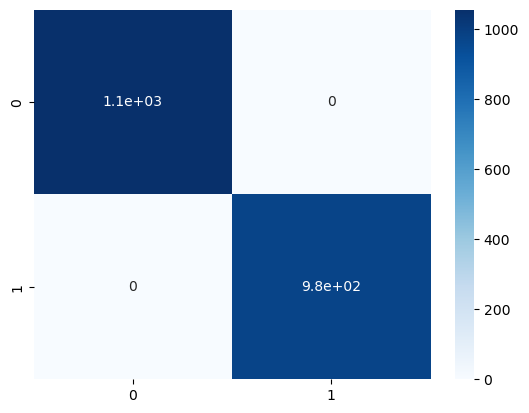

In [46]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")

### Перейдём к следующему [датасэту](https://stepik.org/media/attachments/course/4852/invasion.csv).

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для [новых поступающих данных](https://stepik.org/media/attachments/course/4852/operative_information.csv). Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

In [47]:
inv = pd.read_csv('invasion.csv')
inv.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [49]:
X = inv.drop(['class'], axis=1)
y = inv['class']

In [50]:
rf = RandomForestClassifier(random_state=0)

parametrs = {'n_estimators': range(10, 50, 10),
             'max_depth': range(1, 12, 2),
             'min_samples_leaf': range(1, 7), 
             'min_samples_split': range(2, 9, 2)}

grid_search_cv_clf = GridSearchCV(rf, parametrs, cv=3, n_jobs=-1, verbose=1)

grid_search_cv_clf.fit(X, y)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)},
             verbose=1)

In [52]:
X_test = pd.read_csv('operative_information.csv')
X_test.head(2)

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130


In [54]:
y_pred = grid_search_cv_clf.predict(X_test)

In [55]:
pd.Series(y_pred).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

<Axes: >

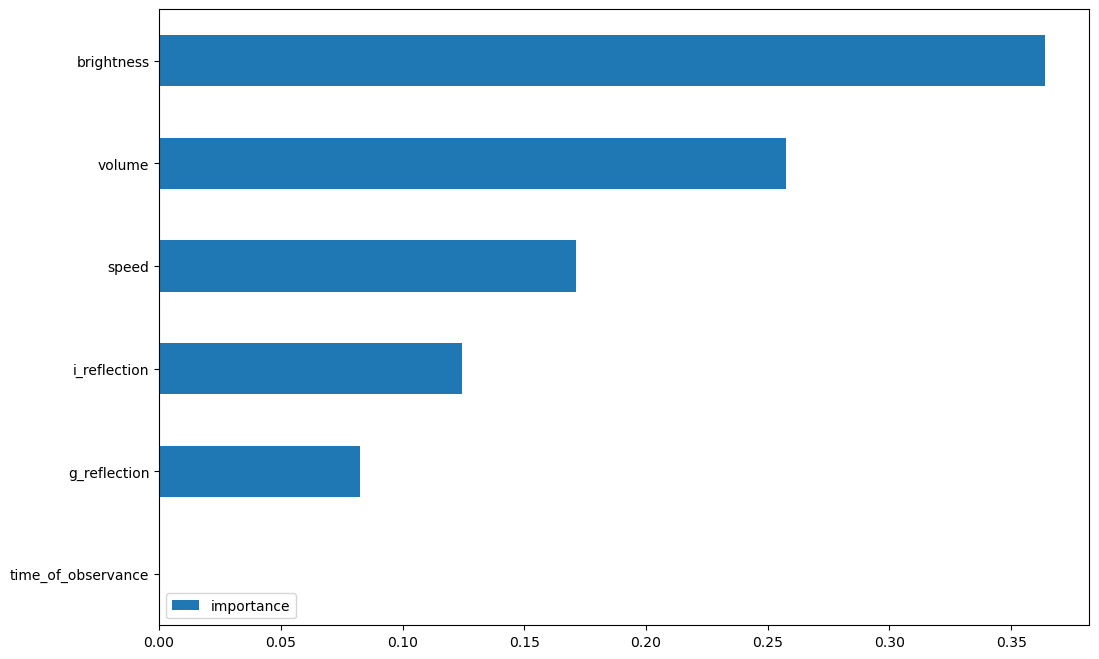

In [56]:
best_clf = grid_search_cv_clf.best_estimator_
imp = pd.DataFrame(best_clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена! Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

Проанализируйте имеющиеся [данные об опасности разных регионов космоса](https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv) и укажите наиболее вероятные причины угрозы

In [57]:
df = pd.read_csv('space_can_be_a_dangerous_place.csv')
df.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [59]:
X = df.drop(['dangerous'], axis=1)
y = df['dangerous']

In [61]:
rf = RandomForestClassifier(random_state=0)

parametrs = {'n_estimators': range(10, 50, 10),
             'max_depth': range(1, 12, 2),
             'min_samples_leaf': range(1, 7), 
             'min_samples_split': range(2, 9, 2)}

random_search_cv_clf = RandomizedSearchCV(rf, parametrs, cv=3, n_jobs=-1, verbose=1)

random_search_cv_clf.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 12, 2),
                                        'min_samples_leaf': range(1, 7),
                                        'min_samples_split': range(2, 9, 2),
                                        'n_estimators': range(10, 50, 10)},
                   verbose=1)

<Axes: >

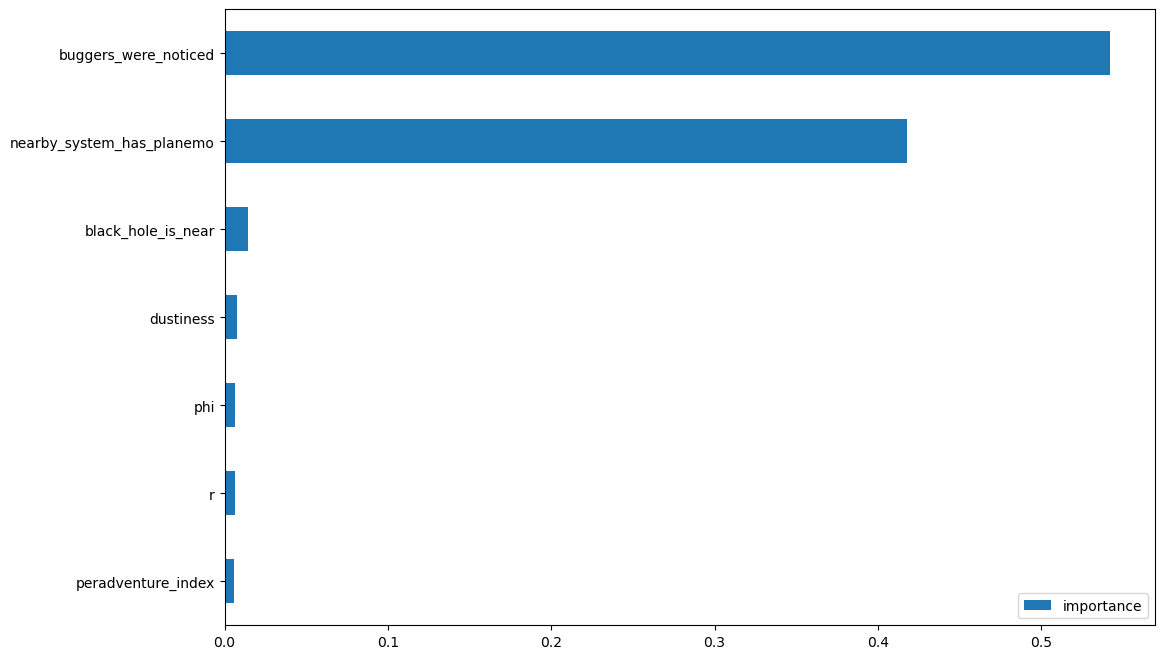

In [65]:
clf = random_search_cv_clf.best_estimator_
imp = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))